# Linear Regression Models on Simulated Data
We will create simulated data and fit simple linear regression models to it in this project.
1. Simulate a data set
2. Partition our data into training, testing, and evaluating sets
3. Fit linear regression model using the least squares approach
4. Test polyniminal fit on our data
5. Assess our least square model on testing data set 
6. Repeat the process with less noise data set
7. Repeat the process with more noise data set
8. Confidence intervals for orginal, less noise, and more noise data sets

## 1. Simulate our data set 

In [17]:
set.seed(6)
x <- rnorm(200, sd = sqrt(1))
head(x, n = 10)

[1]  0.26960598 -0.62998541  0.86865983  1.72719552  0.02418764  0.36802518
 [7] -1.30920430  0.73862193  0.04487299 -1.04839720

In [18]:
eps <- rnorm(200, sd = sqrt(0.25))
head(eps, n = 10)

[1]  0.71105690 -0.37922269 -0.02767146 -0.24022934 -0.46025826 -0.32381437
 [7]  0.25896651  0.73918043 -1.22834203 -0.72472599

In [60]:
y <- -1 + 0.5*x + eps
length(y)
head(y)

[1] 200

[1] -0.1541401 -1.6942154 -0.5933415 -0.3766316 -1.4481644 -1.1398018

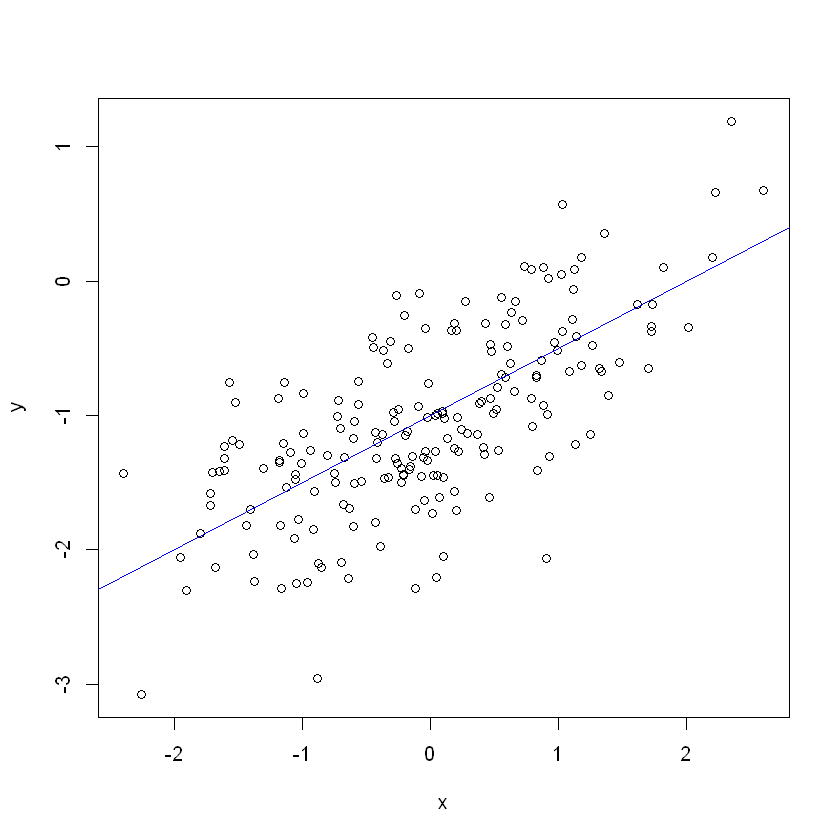

In [28]:
plot(x, y)
abline(-1, 0.5, col = "blue")

## 2. Partitioning our data set into training and testing data sets

In [79]:
#Create Data Frame
simulated_data <- data.frame(x = x, y = y)
head(simulated_data)

#Divide data into training, testing, and evaluating
train <- simulated_data[(1:150),]
head(train)

test <- simulated_data[(151:200),]
head(test)

x,y
0.26960598,-0.1541401
-0.62998541,-1.6942154
0.86865983,-0.5933415
1.72719552,-0.3766316
0.02418764,-1.4481644
0.36802518,-1.1398018


x,y
0.26960598,-0.1541401
-0.62998541,-1.6942154
0.86865983,-0.5933415
1.72719552,-0.3766316
0.02418764,-1.4481644
0.36802518,-1.1398018


,x,y
151,0.5251149,-0.7884476
152,-0.5433253,-1.4945594
153,-1.7170191,-1.6678436
154,1.0301166,-0.3709576
155,-1.1471188,-1.2086931
156,-0.2661295,-0.1028108


## 3. Fit linear regression model to our data set 

In [80]:
train_least_squares_fit <- lm(train$y ~ train$x)
summary(train_least_squares_fit)


Call:
lm(formula = train$y ~ train$x)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.51063 -0.29665 -0.03857  0.36544  1.09840 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.02669    0.03920  -26.19   <2e-16 ***
train$x      0.47546    0.03972   11.97   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.4796 on 148 degrees of freedom
Multiple R-squared:  0.4919,	Adjusted R-squared:  0.4885 
F-statistic: 143.3 on 1 and 148 DF,  p-value: < 2.2e-16


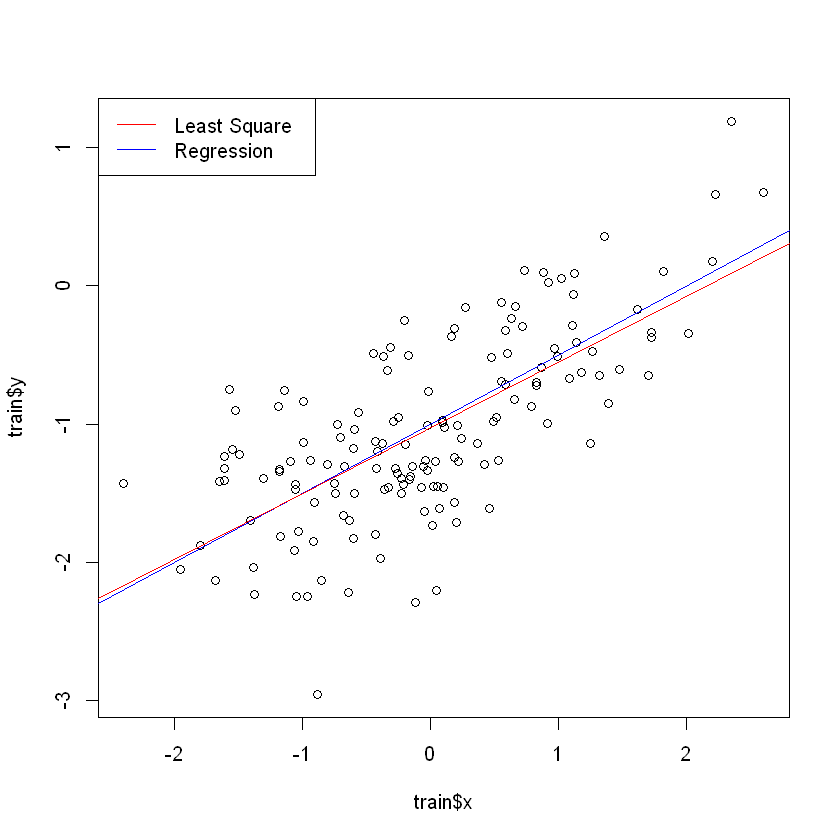

In [81]:
plot(train$x, train$y)
abline(-1, 0.5, col = "blue")
abline(train_least_squares_fit, col = "red")
legend("topleft", c("Least Square", "Regression"), 
        col = c("red", "blue"), lty = c(1,1))

## 4. Test polynominal fit on our data

In [82]:
poly_fit <- lm(train$y ~ train$x + I(train$x^2))
summary(poly_fit)


Call:
lm(formula = train$y ~ train$x + I(train$x^2))

Residuals:
    Min      1Q  Median      3Q     Max 
-1.5066 -0.2961 -0.0231  0.2988  0.9684 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -1.13459    0.04791 -23.683  < 2e-16 ***
train$x       0.45540    0.03856  11.810  < 2e-16 ***
I(train$x^2)  0.10983    0.03013   3.645  0.00037 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.4609 on 147 degrees of freedom
Multiple R-squared:  0.534,	Adjusted R-squared:  0.5277 
F-statistic: 84.24 on 2 and 147 DF,  p-value: < 2.2e-16


## 5. Assess our least square approach on testing data set

In [83]:
#Predict value of y in testing data set
predict_test <- predict(train_least_squares_fit, test)
predict_train <- predict(train_least_squares_fit, train)
head(predict_test)

error_train <- predict_train - train[["y"]]
error_test <- predict_test - test[["y"]]

MSE_train <- mean(error_train**2)
MSE_test <- mean(error_test**2)

MSE_train
MSE_test

Warning message:
"'newdata' had 50 rows but variables found have 150 rows"

1          2          3          4          5          6 
-0.8985050 -1.3262267 -0.6136775 -0.2054762 -1.0151921 -0.8517104

[1] 0.2269922

[1] 0.6258535

## 6. Repeat the process with less noise in the data

x1,y1
1.42211379,-0.2080613
-0.75844539,-1.5682183
-0.05534291,-0.7670735
-0.48045868,-0.7220707
-0.92051652,-1.4530020
-0.64762874,-1.2134068


x1,y1
1.42211379,-0.2080613
-0.75844539,-1.5682183
-0.05534291,-0.7670735
-0.48045868,-0.7220707
-0.92051652,-1.4530020
-0.64762874,-1.2134068


,x1,y1
151,-0.1020102,-0.89347062
152,-0.4457936,-1.38589438
153,0.3813319,-1.32443976
154,0.2279681,-0.57698094
155,0.7297326,-0.97926937
156,2.0605078,-0.04958494



Call:
lm(formula = train1$y1 ~ train1$x1)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.68082 -0.21065 -0.01992  0.20205  0.80845 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.01425    0.02432  -41.71   <2e-16 ***
train1$x1    0.48428    0.02545   19.03   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.2974 on 148 degrees of freedom
Multiple R-squared:  0.7098,	Adjusted R-squared:  0.7079 
F-statistic: 362.1 on 1 and 148 DF,  p-value: < 2.2e-16


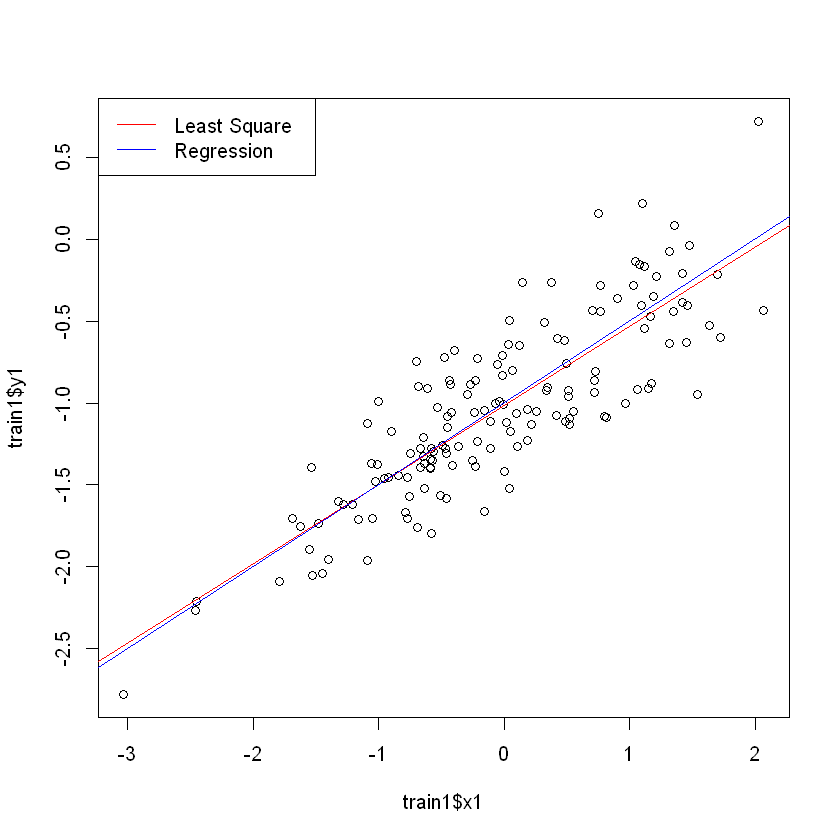

In [96]:
set.seed(6)
eps1 <- rnorm(200, sd = sqrt(0.09))
x1 <- rnorm(200)
y1 <- -1 + 0.5*x1 + eps1

#Data Frame for Less Noise Data Set
simulated_data1 <- data.frame(x1 = x1, y1 = y1)
head(simulated_data1)

#Divide data into training, testing, and evaluating
train1 <- simulated_data1[(1:150),]
head(train1)
test1 <- simulated_data1[(151:200),]
head(test1)

#Fit Linear Regression Model with Least Square Approach 
train_least_squares_fit1 <- lm(train1$y1 ~ train1$x1)
summary(train_least_squares_fit1)

plot(train1$x1, train1$y1)
abline(train_least_squares_fit1, col = "red")
abline(-1, 0.5, col = "blue")
legend("topleft", c("Least Square", "Regression"),
        col = c("red", "blue"), lty = c(1, 1))

In [97]:
#Assess the model with testing data
predict_test1 <- predict(train_least_squares_fit1, test1)
predict_train1 <- predict(train_least_squares_fit1, train1)
head(predict_test1)

error_train1 <- predict_train1 - train1[["y1"]]
error_test1 <- predict_test1 - test1[["y1"]]

MSE_train1 <- mean(error_train1**2)
MSE_test1 <- mean(error_test1**2)

MSE_train1
MSE_test1

Warning message:
"'newdata' had 50 rows but variables found have 150 rows"

1          2          3          4          5          6 
-0.3255561 -1.3815508 -1.0410544 -1.2469283 -1.4600382 -1.3278849

[1] 0.08726925

[1] 0.6122664

## 7. Repeat the process with more noise in the data 

x2,y2
1.42211379,-0.08899796
-0.75844539,-1.84643238
-0.05534291,-0.38345609
-0.48045868,0.04069314
-0.92051652,-1.44232023
-0.64762874,-1.05087959


x2,y2
1.42211379,-0.08899796
-0.75844539,-1.84643238
-0.05534291,-0.38345609
-0.48045868,0.04069314
-0.92051652,-1.44232023
-0.64762874,-1.05087959


,x2,y2
151,-0.1020102,-0.6615695
152,-0.4457936,-1.6258376
153,0.3813319,-2.0827095
154,0.2279681,-0.1220610
155,0.7297326,-1.4858598
156,2.0605078,-0.1671130



Call:
lm(formula = train2$y2 ~ train2$x2)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.68304 -0.52074 -0.04925  0.49947  1.99853 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.03523    0.06012 -17.221  < 2e-16 ***
train2$x2    0.46113    0.06292   7.329 1.39e-11 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.7352 on 148 degrees of freedom
Multiple R-squared:  0.2663,	Adjusted R-squared:  0.2613 
F-statistic: 53.72 on 1 and 148 DF,  p-value: 1.393e-11


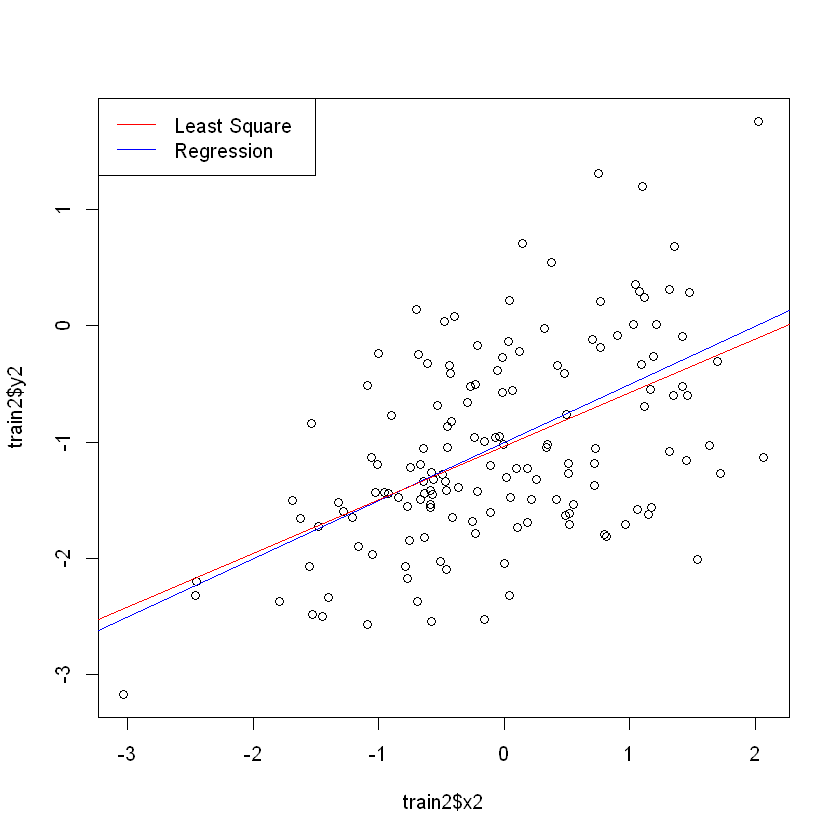

In [98]:
set.seed(6)
eps2 <- rnorm(200, sd = sqrt(0.55))
x2 <- rnorm(200)
y2 <- -1 + 0.5*x2 + eps2

#Data Frame for Less Noise Data Set
simulated_data2 <- data.frame(x2 = x2, y2 = y2)
head(simulated_data2)

#Divide data into training, testing, and evaluating
train2 <- simulated_data2[(1:150),]
head(train2)

#Assess on testing data set
test2 <- simulated_data2[(151:200),]
head(test2)

train_least_squares_fit2 <- lm(train2$y2 ~ train2$x2)
summary(train_least_squares_fit2)

plot(train2$x2, train2$y2)
abline(-1, 0.5, col = "blue")
abline(train_least_squares_fit2, col = "red")

legend("topleft", c("Least Square", "Regression"),
        col = c("red", "blue"), lty = c(1, 1))

In [99]:
#Assess the model with testing data
predict_test2 <- predict(train_least_squares_fit2, test2)
predict_train2 <- predict(train_least_squares_fit2, train2)
head(predict_test2)

error_train2 <- predict_train2 - train2[["y2"]]
error_test2 <- predict_test2 - test2[["y2"]]

MSE_train2 <- mean(error_train2**2)
MSE_test2 <- mean(error_test2**2)

MSE_train2
MSE_test2

Warning message:
"'newdata' had 50 rows but variables found have 150 rows"

1          2          3          4          5          6 
-0.3794527 -1.3849780 -1.0607551 -1.2567895 -1.4597142 -1.3338769

[1] 0.5333121

[1] 0.9948731

## 8. Confidence Intervals for the coefficients 3 data sets 

In [100]:
confint(train_least_squares_fit)

,2.5 %,97.5 %
(Intercept),-1.1041630,-0.9492219
train$x,0.3969713,0.5539533


In [101]:
confint(train_least_squares_fit1)

,2.5 %,97.5 %
(Intercept),-1.0623080,-0.9661982
train1$x1,0.4339827,0.5345714


In [102]:
confint(train_least_squares_fit2)

,2.5 %,97.5 %
(Intercept),-1.154030,-0.9164398
train2$x2,0.336801,0.5854627
